In [1]:
from pylab import *


import pandas_datareader.data as web
import datetime

In [2]:
# Aggregate Bonds ETF (BND) 10%
# Small Cap ETF (VB) 20%
# Developed markets ETF (VEA) 25%
# S&P 500 ETF (VOO) 25%
# Emerging Markets ETF (VWO) 20%
symbols = ['VOO','VEA', 'VB', 'VWO','BND']

In [3]:
price_data = web.get_data_yahoo(symbols,
                               start = '2016-01-01',
                               end = '2020-12-31')

In [4]:
print(price_data.head())

Attributes   Adj Close                                              \
Symbols            VOO        VEA         VB        VWO        BND   
Date                                                                 
2016-01-04  164.283936  30.214212  99.598419  27.064051  68.581879   
2016-01-05  164.578018  30.180807  99.653305  27.123657  68.666832   
2016-01-06  162.492264  29.629477  98.162270  26.638245  68.972687   
2016-01-07  158.534714  29.069801  95.518631  25.778118  68.981186   
2016-01-08  156.850006  28.710604  94.192238  25.548187  69.066154   

Attributes       Close                                               ...  \
Symbols            VOO        VEA          VB        VWO        BND  ...   
Date                                                                 ...   
2016-01-04  184.309998  36.169998  108.879997  31.780001  80.720001  ...   
2016-01-05  184.639999  36.130001  108.940002  31.850000  80.820000  ...   
2016-01-06  182.300003  35.470001  107.309998  31.280001  8

In [5]:
price_data = price_data['Adj Close']
print(price_data.head())

Symbols            VOO        VEA         VB        VWO        BND
Date                                                              
2016-01-04  164.283936  30.214212  99.598419  27.064051  68.581879
2016-01-05  164.578018  30.180807  99.653305  27.123657  68.666832
2016-01-06  162.492264  29.629477  98.162270  26.638245  68.972687
2016-01-07  158.534714  29.069801  95.518631  25.778118  68.981186
2016-01-08  156.850006  28.710604  94.192238  25.548187  69.066154


In [6]:
w = [0.1,0.2,0.25,0.25,0.2]

In [7]:
# calculate the asset returns in our portfolio
ret_data = price_data.pct_change()[1:]
print(ret_data.head())

Symbols          VOO       VEA        VB       VWO       BND
Date                                                        
2016-01-05  0.001790 -0.001106  0.000551  0.002202  0.001239
2016-01-06 -0.012673 -0.018268 -0.014962 -0.017896  0.004454
2016-01-07 -0.024355 -0.018889 -0.026931 -0.032289  0.000123
2016-01-08 -0.010627 -0.012356 -0.013886 -0.008920  0.001232
2016-01-11  0.000114  0.004364 -0.004856 -0.004333 -0.004183


In [8]:
#the sum of the weighted returns of the assets, no weight
port_ret = ret_data.sum(axis=1)
# axis =1 tells pandas we want to add
# the rows
port_ret

Date
2016-01-05    0.004677
2016-01-06   -0.059345
2016-01-07   -0.102342
2016-01-08   -0.044557
2016-01-11   -0.008893
                ...   
2020-12-24    0.001937
2020-12-28    0.011650
2020-12-29    0.005983
2020-12-30    0.028541
2020-12-31   -0.003243
Length: 1258, dtype: float64

In [9]:
#calculate the weighted returns of our assets
weighted_returns = (w * ret_data)
print(weighted_returns.head())

Symbols          VOO       VEA        VB       VWO       BND
Date                                                        
2016-01-05  0.000179 -0.000221  0.000138  0.000551  0.000248
2016-01-06 -0.001267 -0.003654 -0.003741 -0.004474  0.000891
2016-01-07 -0.002436 -0.003778 -0.006733 -0.008072  0.000025
2016-01-08 -0.001063 -0.002471 -0.003472 -0.002230  0.000246
2016-01-11  0.000011  0.000873 -0.001214 -0.001083 -0.000837


In [10]:
#the sum of the weighted returns of the assets
port_ret = weighted_returns.sum(axis=1)
# axis =1 tells pandas we want to add
# the rows
port_ret

Date
2016-01-05    0.000894
2016-01-06   -0.012245
2016-01-07   -0.020994
2016-01-08   -0.008989
2016-01-11   -0.002250
                ...   
2020-12-24   -0.000329
2020-12-28    0.001315
2020-12-29    0.001401
2020-12-30    0.006794
2020-12-31   -0.001349
Length: 1258, dtype: float64

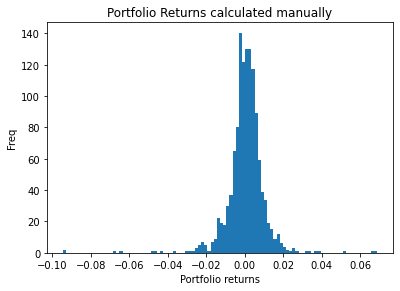

In [11]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 100)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show();

In [12]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 12, 31)
SP500 = web.DataReader(['sp500'], 'fred', start, end)
SP500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1
#Drop all Not a number values using drop method.
SP500.dropna(inplace = True)
SP500

,sp500,daily_return
DATE,,
2016-01-05,2016.71,0.002012
2016-01-06,1990.26,-0.013115
2016-01-07,1943.09,-0.023700
2016-01-08,1922.03,-0.010838
2016-01-11,1923.67,0.000853
...,...,...
2020-12-23,3690.01,0.000746
2020-12-24,3703.06,0.003537
2020-12-29,3727.04,-0.002227


In [13]:
SP500['daily_return']

DATE
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
2016-01-11    0.000853
                ...   
2020-12-23    0.000746
2020-12-24    0.003537
2020-12-29   -0.002227
2020-12-30    0.001342
2020-12-31    0.006439
Name: daily_return, Length: 1213, dtype: float64

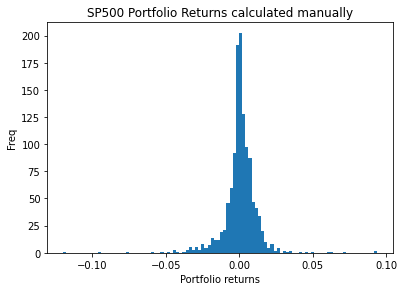

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(SP500['daily_return'], bins = 100)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("SP500 Portfolio Returns calculated manually")
plt.show();

In [15]:
result= port_ret-SP500['daily_return']
result

2016-01-05   -0.001118
2016-01-06    0.000871
2016-01-07    0.002707
2016-01-08    0.001849
2016-01-11   -0.003103
                ...   
2020-12-24   -0.003866
2020-12-28         NaN
2020-12-29    0.003629
2020-12-30    0.005452
2020-12-31   -0.007788
Length: 1258, dtype: float64

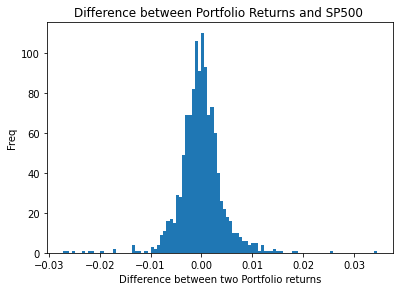

In [17]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(result, bins = 100)
ax1.set_xlabel('Difference between two Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Difference between Portfolio Returns and SP500 ")
plt.show();